In [2]:
import sys
import os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *

In [3]:
def f(x, y):
    return x ** 2 / 20.0 + y ** 2

def df(x, y):
    '''
    f(x, y)的梯度
    '''
    return x / 10.0, 2.0 * y

In [4]:
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

In [5]:
def plot_contour():
    x = np.arange(-10, 10, .01)
    y = np.arange(-5, 5, .01)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    mask = Z > 7
    Z[mask] = 0
    plt.contour(X, Y, Z)
    plt.axis([-10, 10, -5, 5])
    plt.xlabel('x')
    plt.ylabel('y')

In [6]:
def optimizer_history(optimizer, optimizer_name='SGD'):
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    plt.plot(x_history, y_history, 'ro-', label=optimizer_name)
    plt.plot(0, 0, '+')
    plt.legend()

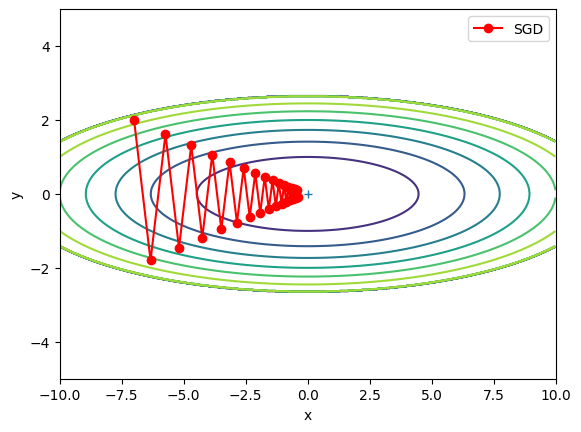

In [7]:
optimizer = SGD(lr=.95)
plot_contour()
optimizer_history(optimizer, optimizer_name='SGD')

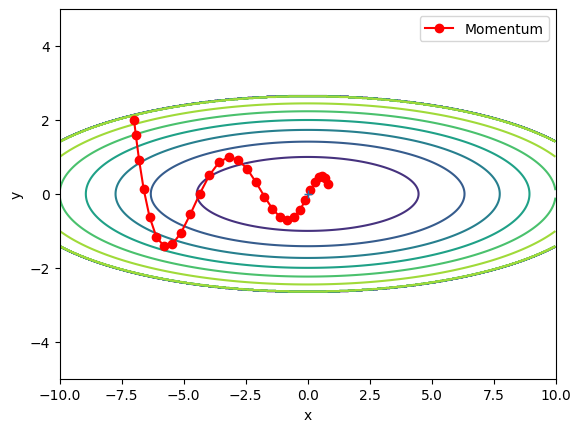

In [8]:
optimizer = Momentum(lr=.1)
plot_contour()
optimizer_history(optimizer, optimizer_name='Momentum')

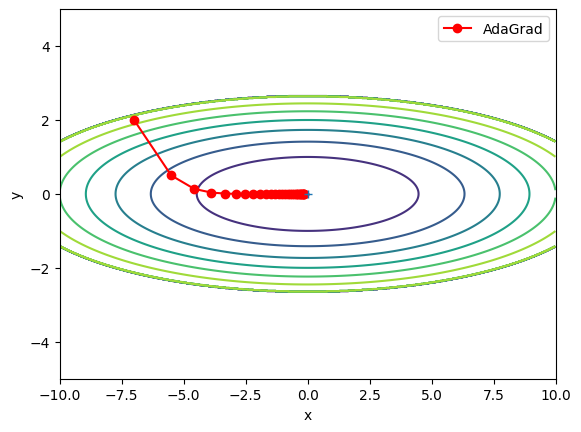

In [9]:
optimizer = AdaGrad(lr=1.5)
plot_contour()
optimizer_history(optimizer, optimizer_name='AdaGrad')

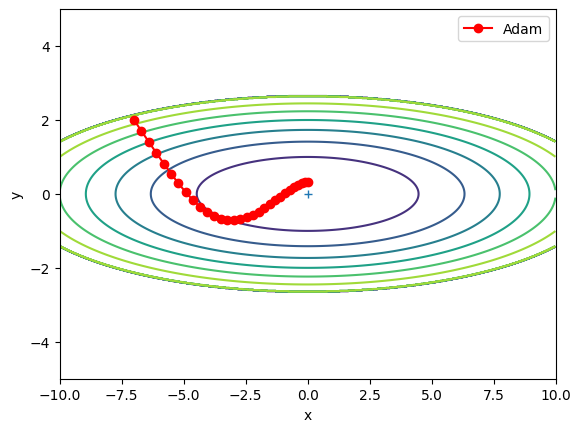

In [12]:
optimizer = Adam(lr=.3)
plot_contour()
optimizer_history(optimizer=optimizer, optimizer_name='Adam')